In [0]:
## Wen Shi, wshi13@jh.edu, github ID: BigGiava

Question 1

In [23]:
## Load data
! if [ ! -e orings.csv ]; \
then wget https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/orings.csv; \
fi;
  
## Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
import statsmodels.formula.api as smf
import statsmodels as sm
  
dat = pd.read_csv("orings.csv")
dat.head(5)

,Unnamed: 0,Temperature,Erosion,Blowby,Total
0,1,53,3,2,5
1,2,57,1,0,1
2,3,58,1,0,1
3,4,63,1,0,1
4,5,66,0,0,0


Text(0, 0.5, 'o-ring failure')

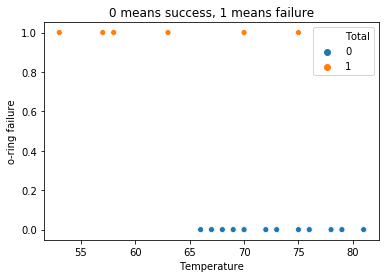

In [24]:
## 1a
temp = dat.Temperature
failure = ~(dat.Total == 0)*1
sns.scatterplot(temp, failure, hue=failure)
plt.title('0 means success, 1 means failure')
plt.xlabel('Temperature')
plt.ylabel('o-ring failure')

[14.861927086730814, -0.22950051284078993]


Text(0, 0.5, 'o-ring failure')

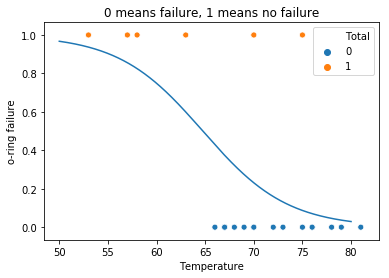

In [25]:
## 1b
## Use solver LBFGS for fitting logistic regression
lr = lm.LogisticRegression(fit_intercept=True, solver='lbfgs')
temp1 = dat[['Temperature']]
fit = lr.fit(temp1, failure)

## 1c
beta0, beta1 = [fit.intercept_[0], fit.coef_[0][0]]
print([beta0, beta1])
n = 1000
xplot = np.linspace(50, 80, n)
eta = beta0 + beta1 * xplot
p = 1 / (1 + np.exp(-eta))
sns.lineplot(xplot, p)
sns.scatterplot(temp, failure, hue=failure)
plt.title('0 means failure, 1 means no failure')
plt.xlabel('Temperature')
plt.ylabel('o-ring failure')


In [27]:
## 1d
testt = 74
eta = beta0 + beta1 * testt
p = 1 / (1 + np.exp(-eta))
print('THe estimated probability of failure for oring at 84 degrees is: p = ' + str(p))

THe estimated probability of failure for oring at 84 degrees is: p = 0.107061826026118


Question 2

In [18]:
from google.colab import files
uploaded = files.upload()

Saving q21.PNG to q21 (1).PNG
Saving q22.PNG to q22 (1).PNG


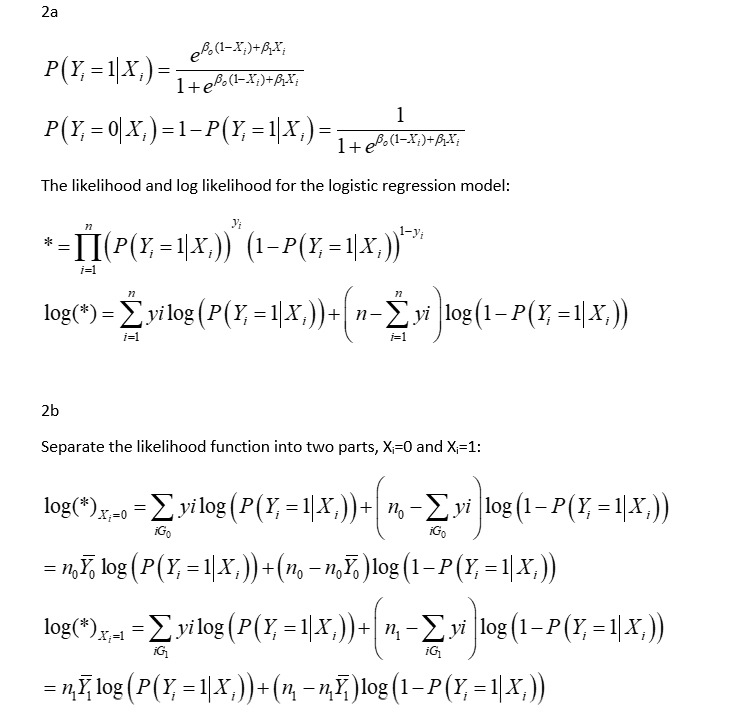

In [16]:
from IPython.display import Image
Image("q21.PNG", width=800, height=800)

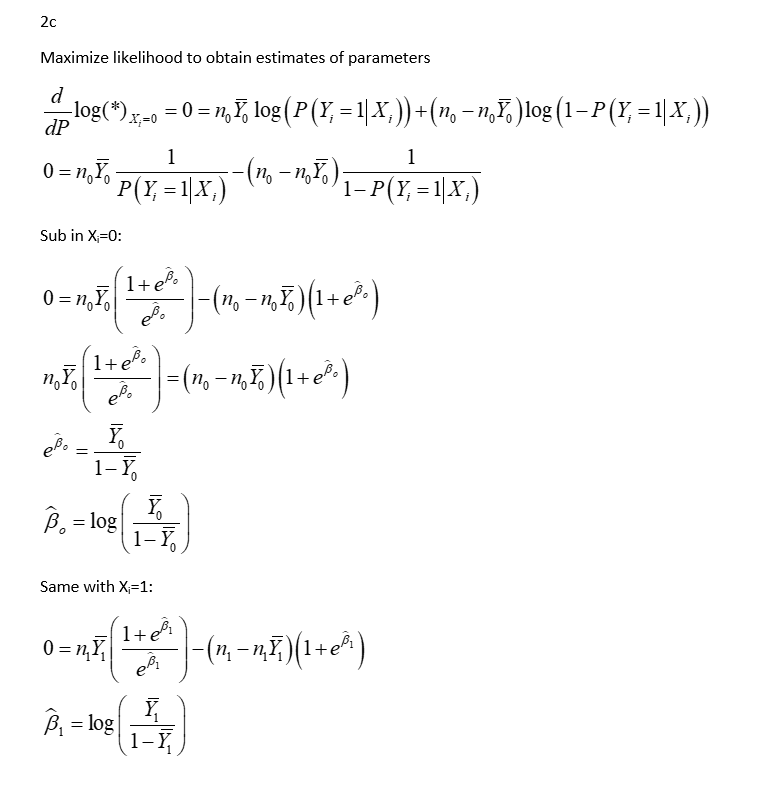

In [20]:
Image("q22 (1).PNG", width=800, height=800)

Question 3  
The .csv file loaded is the shot log for all NBA players during 2014-2015 season. The project will be to analyze the relation between 3-point shot distance and whether the shot is made or not.  
  
  
The file is downloaded at:https://www.kaggle.com/dansbecker/nba-shot-logs

In [22]:
## Load data
! if [ ! -e shot_logs.csv ]; \
then wget https://raw.githubusercontent.com/BigGiava/GuavaHouse/master/shot_logs.csv; \
fi;
  
dat1 = pd.read_csv("shot_logs.csv")
dat1.head(10)

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,1.9,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,0.8,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,2.7,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,1.9,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,2.7,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148
5,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,6,2,8:15,9.1,2,4.4,18.4,2,missed,"Williams, Deron",101114,2.6,0,0,brian roberts,203148
6,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,7,4,10:15,14.5,11,9.0,20.7,2,missed,"Jack, Jarrett",101127,6.1,0,0,brian roberts,203148
7,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,8,4,8:00,3.4,3,2.5,3.5,2,made,"Plumlee, Mason",203486,2.1,1,2,brian roberts,203148
8,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,9,4,5:14,12.4,0,0.8,24.6,3,missed,"Morris, Darius",202721,7.3,0,0,brian roberts,203148
9,21400890,"MAR 03, 2015 - CHA vs. LAL",H,W,1,1,2,11:32,17.4,0,1.1,22.4,3,missed,"Ellington, Wayne",201961,19.8,0,0,brian roberts,203148
